In [1]:
from pycaret.regression import *
import pandas as pd
import numpy as np

In [2]:
all_data=pd.read_csv("Mortality_09_UP.data",nrows=25175)
columns = ["age","sex", "highest_qualification", "rural", "disability_status", "is_water_filter", "chew", "smoke", "alcohol","treatment_source"]
death = all_data[columns].copy()
for column in columns:
    death[column].fillna(death[column].mode()[0], inplace=True)

In [9]:
death.dtypes

age                      float64
sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [12]:
np.average(death["disability_status"])

0.08766633565044687

In [3]:
s = setup(death, target='age',session_id=110)

In [4]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:33:37
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

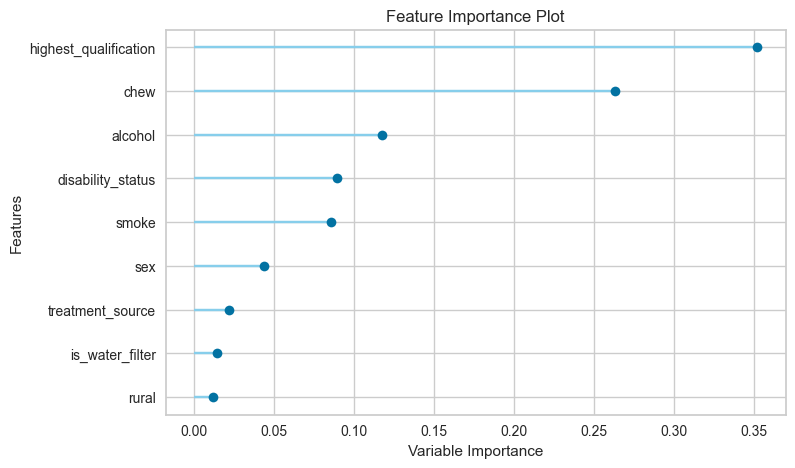

In [7]:
plot_model(best, plot = 'feature')

In [8]:
save_model(best, 'mortality_prediction_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\zahra\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['sex', 'highest_qualification',
                                              'rural', 'disability_status',
                                              'is_water_filter', 'chew', 'smoke',
                                              'alcohol', 'treatment_source'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', GradientBoostingRegressor(random_state=110))]),
 'mortality_prediction_pipeline.pkl')